<a href="https://colab.research.google.com/github/hsantos1985/neural_network/blob/main/OLITST_REDES_NEURAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

!pip install unidecode
from unidecode import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1- OBTENÇÃO DA BASE DE DADOS

In [3]:
#OLIST ORDER REVIEWS
olist_principal= pd.read_csv('/content/drive/MyDrive/dataset_projeto/olist_order_reviews_dataset.csv')
olist_principal


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#2-ANÁLISE PRELIMINAR E CRIAÇÃO DE COLUNAS DA BASE DE DADOS

In [4]:
# Contar o número de pedidos únicos
qtd_olist_unico = olist_principal['order_id'].nunique()
# Imprimir o resultado usando f-strings
print(f'QTD pedidos únicos: {qtd_olist_unico}')

QTD pedidos únicos: 98673


In [5]:
# Print do shape e contagem/porcentagem de 'review_score'
print("Shape of olist_principal:", olist_principal.shape)

# Obter categorias únicas em 'review_score' e ordenar
review_score_categories = sorted(olist_principal['review_score'].unique())

# Exibir a contagem e porcentagem de 'review_score' para cada valor único
print("\nAnálise por review_score:\n")
for review_score_category in review_score_categories:
    print(f"Para 'review_score' = {review_score_category}:")

    # Filtrar o DataFrame para a categoria específica de 'review_score'
    subset = olist_principal[olist_principal['review_score'] == review_score_category]

    # Calcular a contagem e porcentagem para a categoria atual
    count = len(subset)
    percentage = (count / len(olist_principal)) * 100

    # Exibir a contagem e porcentagem
    print(f"  Contagem: {count}")
    print(f"  Porcentagem: {percentage:.2f}%")

    print()  # Linha em branco para separar os grupos

Shape of olist_principal: (99224, 7)

Análise por review_score:

Para 'review_score' = 1:
  Contagem: 11424
  Porcentagem: 11.51%

Para 'review_score' = 2:
  Contagem: 3151
  Porcentagem: 3.18%

Para 'review_score' = 3:
  Contagem: 8179
  Porcentagem: 8.24%

Para 'review_score' = 4:
  Contagem: 19142
  Porcentagem: 19.29%

Para 'review_score' = 5:
  Contagem: 57328
  Porcentagem: 57.78%



In [6]:
olist_principal.shape

(99224, 7)

In [7]:
#retirada dos reiews diferentes de 3
olist_principal=(
olist_principal[olist_principal['review_score'] != 3].reset_index(drop=True)
)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
91040,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
91041,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
91042,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
91043,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
olist_principal['classe']=  np.where(
    olist_principal['review_score']>=4,'positivo','negativo'
)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,classe
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,positivo
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,positivo
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,positivo
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,positivo
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,positivo
...,...,...,...,...,...,...,...,...
91040,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,positivo
91041,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,positivo
91042,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,positivo
91043,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,positivo


In [9]:
olist_principal['review'] = np.where(
    olist_principal['review_comment_message'].isna(), 'sem review', 'com review'
)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,classe,review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,positivo,sem review
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,positivo,sem review
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,positivo,sem review
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,positivo,com review
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,positivo,com review
...,...,...,...,...,...,...,...,...,...
91040,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,positivo,sem review
91041,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,positivo,sem review
91042,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,positivo,com review
91043,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,positivo,sem review


In [10]:
# Obter categorias únicas em 'review_comment_message'
review_categories = olist_principal['review'].unique()

# Exibir a contagem e porcentagem de 'classe' para cada categoria de 'review_comment_message'
for review_category in review_categories:
    print(f"Para '{review_category}':")

    # Filtrar o DataFrame para a categoria específica de 'review_comment_message'
    subset = olist_principal[olist_principal['review'] == review_category]

    # Calcular a contagem e porcentagem para 'classe'
    value_counts_classe = subset['classe'].value_counts()
    percentage_counts_classe = (value_counts_classe / len(subset)) * 100

    # Exibir a contagem e porcentagem
    for category in value_counts_classe.index:
        print(f" Classe: {category} - Contagem: {value_counts_classe[category]}, Porcentagem: {percentage_counts_classe[category]:.2f}%")



Para 'sem review':
 Classe: positivo - Contagem: 49940, Porcentagem: 93.13%
 Classe: negativo - Contagem: 3685, Porcentagem: 6.87%
Para 'com review':
 Classe: positivo - Contagem: 26530, Porcentagem: 70.90%
 Classe: negativo - Contagem: 10890, Porcentagem: 29.10%


In [11]:
olist_principal = olist_principal[olist_principal['review_comment_message'].notna()].reset_index(drop=True)
olist_principal

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,classe,review
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,positivo,com review
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,positivo,com review
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,positivo,com review
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,positivo,com review
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,positivo,com review
...,...,...,...,...,...,...,...,...,...
37415,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,NaN,Tive um problema na entrega em que o correio c...,2018-02-21 00:00:00,2018-02-23 11:43:12,negativo,com review
37416,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,positivo,com review
37417,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,positivo,com review
37418,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,positivo,com review


In [12]:
# Contar o número de pedidos únicos
qtd_olist_unico = olist_principal['order_id'].nunique()
# Imprimir o resultado usando f-strings
print(f'QTD pedidos únicos: {qtd_olist_unico}')

QTD pedidos únicos: 37299


#3-CRIAÇÃO DA ABT

In [13]:
#CRIAÇÃO D ABT
abt = olist_principal[['review_comment_message','classe']]
abt

,review_comment_message,classe
0,Recebi bem antes do prazo estipulado.,positivo
1,Parabéns lojas lannister adorei comprar pela I...,positivo
2,aparelho eficiente. no site a marca do aparelh...,positivo
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo
4,"Vendedor confiável, produto ok e entrega antes...",positivo
...,...,...
37415,Tive um problema na entrega em que o correio c...,negativo
37416,para este produto recebi de acordo com a compr...,positivo
37417,Entregou dentro do prazo. O produto chegou em ...,positivo
37418,"Excelente mochila, entrega super rápida. Super...",positivo


In [14]:
#CRIANDO A COLUNA TARGET
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
abt['target'] = le.fit_transform(abt['classe'])
abt.head(10)

<ipython-input-14-2f7dc9526d41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt['target'] = le.fit_transform(abt['classe'])


,review_comment_message,classe,target
0,Recebi bem antes do prazo estipulado.,positivo,1
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1
2,aparelho eficiente. no site a marca do aparelh...,positivo,1
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1
5,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",negativo,0
6,Péssimo,negativo,0
7,Loja nota 10,positivo,1
8,obrigado pela atençao amim dispensada,positivo,1
9,A compra foi realizada facilmente.\r\nA entreg...,positivo,1


#4-PROCESSAMENTO DO TEXTO

In [15]:
import tensorflow

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, CategoryEncoding, Flatten

In [17]:
#tokenização das palavras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(abt['review_comment_message']) #Treina o Tokenizer no conjunto de frases.
abt['comentarios_tokenizados'] = tokenizer.texts_to_sequences(abt['review_comment_message'])

<ipython-input-17-aa75e07b7965>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt['comentarios_tokenizados'] = tokenizer.texts_to_sequences(abt['review_comment_message'])


In [18]:
abt

,review_comment_message,classe,target,comentarios_tokenizados
0,Recebi bem antes do prazo estipulado.,positivo,1,"[15, 26, 12, 5, 8, 211]"
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1,"[69, 157, 58, 82, 72, 105, 436, 604, 3, 591, 6..."
2,aparelho eficiente. no site a marca do aparelh...,positivo,1,"[441, 325, 16, 63, 4, 390, 5, 441, 130, 2189, ..."
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1,"[32, 22, 164, 3513, 84, 168, 756, 57, 20]"
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1,"[120, 352, 1, 100, 3, 11, 12, 5, 8]"
...,...,...,...,...
37415,Tive um problema na entrega em que o correio c...,negativo,0,"[93, 22, 110, 30, 11, 24, 10, 2, 200, 2557, 16..."
37416,para este produto recebi de acordo com a compr...,positivo,1,"[27, 247, 1, 15, 6, 246, 14, 4, 38, 462]"
37417,Entregou dentro do prazo. O produto chegou em ...,positivo,1,"[141, 50, 5, 8, 2, 1, 13, 24, 194, 252, 45, 9,..."
37418,"Excelente mochila, entrega super rápida. Super...",positivo,1,"[40, 374, 11, 44, 49, 44, 17, 162, 34]"


In [19]:
#erificação do max length dos comentários
max_length = max(len(i) for i in abt['comentarios_tokenizados'])
max_length

45

In [20]:
#aplicação do padding
padded_seq=pad_sequences(abt['comentarios_tokenizados'], maxlen=max_length, padding='post')
padded_seq

array([[ 15,  26,  12, ...,   0,   0,   0],
       [ 69, 157,  58, ...,   0,   0,   0],
       [441, 325,  16, ...,   0,   0,   0],
       ...,
       [141,  50,   5, ...,   0,   0,   0],
       [ 40, 374,  11, ...,   0,   0,   0],
       [ 39,   1,  13, ...,   0,   0,   0]], dtype=int32)

In [21]:
#codificação dos rotulos
labels = np.array(abt['target'])
labels

array([1, 1, 1, ..., 1, 1, 0])

In [22]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(padded_seq, labels, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(29936, 45)

In [24]:
# Calcula o tamanho do vocabulário, adicionando 1 para incluir o índice zero reservado para padding.
vocab_size = len(tokenizer.word_index) + 1
vocab_size

15152

In [25]:
# Dimensão do vetor de embedding
X_train.shape[0]

29936

In [26]:
embedding_dim=X_train.shape[0]

#3-CRIAÇÃO DOS MODELOS

##3.1- MODELO REDE DENSA

In [27]:
# Modelo Denso (MLP)
model_dense_embedding = Sequential()
model_dense_embedding.add(Input(shape=(max_length, 1)))
model_dense_embedding.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_dense_embedding.add(Flatten())  # Achatar a saída para entrada na camada densa
model_dense_embedding.add(Dense(units=32, activation='relu'))
model_dense_embedding.add(Dense(units=1, activation='sigmoid'))

In [28]:
#salvar o modelo
model_dense_embedding.save('model_dense_embedding.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Carregando o modelo salvo
#from tensorflow.keras.models import load_model
#model_dense_embedding = load_model('model_dense_embedding.h5')

In [30]:
#COMPILAÇÃO DO MODELO
model_dense_embedding.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
#treino do modelo
#import tensorflow as tf
#with tf.device('/device:GPU:0'):
historico = model_dense_embedding.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
300/300 [==============================] - 57s 180ms/step - loss: 0.4715 - accuracy: 0.8909
Epoch 2/10
300/300 [==============================] - 40s 134ms/step - loss: 0.0968 - accuracy: 0.9689
Epoch 3/10
300/300 [==============================] - 38s 128ms/step - loss: 0.0495 - accuracy: 0.9853
Epoch 4/10
300/300 [==============================] - 37s 124ms/step - loss: 0.0372 - accuracy: 0.9899
Epoch 5/10
300/300 [==============================] - 37s 123ms/step - loss: 0.0298 - accuracy: 0.9912
Epoch 6/10
300/300 [==============================] - 37s 124ms/step - loss: 0.0316 - accuracy: 0.9901
Epoch 7/10
300/300 [==============================] - 37s 122ms/step - loss: 0.0399 - accuracy: 0.9882
Epoch 8/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0491 - accuracy: 0.9855
Epoch 9/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0311 - accuracy: 0.9914
Epoch 10/10
300/300 [==============================] - 37s 122ms/step - l

In [32]:
# Avaliação do modelo
loss, accuracy = model_dense_embedding.evaluate(X_test, y_test)
print(f'model_dense_embedding: {loss:.4f}, Accuracy: {accuracy:.4f}')

234/234 [==============================] - 1s 4ms/step - loss: 0.6096 - accuracy: 0.9105
model_dense_embedding: 0.6096, Accuracy: 0.9105


In [33]:
#CRIAÇÃO DA MATRIZ DE CONFUSÃO
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
#ponto de corte
abt['target'].mean()

0.7089791555318011

234/234 [==============================] - 1s 3ms/step


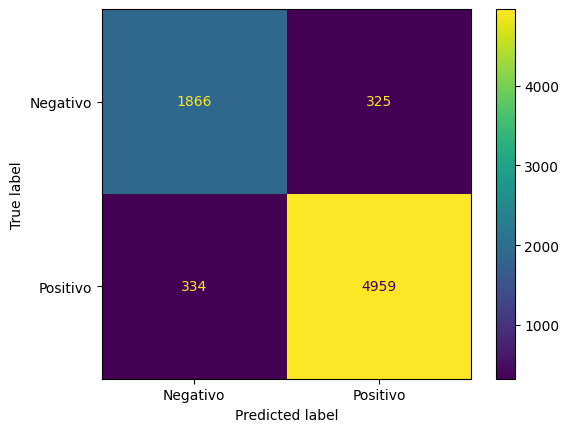

In [35]:
#criação das probabilidades
y_pred_prob = model_dense_embedding.predict(X_test)

#estabelecendo o ponto de corte
y_pred = (y_pred_prob > abt['target'].mean()).astype(int)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(values_format='d')

In [36]:
#metricas
from sklearn.metrics import balanced_accuracy_score,accuracy_score, precision_score, recall_score, f1_score
# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir as métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Acurácia: 0.9119
Acurácia balanceada: 0.8943
Precisão: 0.9385
Recall: 0.9369
F1-Score: 0.9377


##3.2-LSTM

In [37]:
#modelo com Category Enconding

num_tokens = vocab_size

model_lstm_onehot = Sequential()
model_lstm_onehot.add(Input(shape=(max_length, 1)))
model_lstm_onehot.add(TimeDistributed(CategoryEncoding(num_tokens=num_tokens, output_mode='one_hot')))
model_lstm_onehot.add(LSTM(units=32))
model_lstm_onehot.add(Dense(units=1, activation='sigmoid'))  # Camada de saída com sigmoide

In [38]:
#salvar o modelo
model_lstm_onehot.save('model_lstm_onehot.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# Compilação do modelo
model_lstm_onehot.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
historico2 = model_lstm_onehot.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
300/300 [==============================] - 6s 12ms/step - loss: 0.3199 - accuracy: 0.8656
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1655 - accuracy: 0.9415
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1331 - accuracy: 0.9558
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1146 - accuracy: 0.9650
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.1013 - accuracy: 0.9697
Epoch 6/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0924 - accuracy: 0.9740
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0861 - accuracy: 0.9757
Epoch 8/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0782 - accuracy: 0.9779
Epoch 9/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0768 - accuracy: 0.9789
Epoch 10/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0718 - accura

In [41]:
# Avaliação do modelo
loss, accuracy = model_lstm_onehot.evaluate(X_test, y_test)
print(f'model_lstm_onehot - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

234/234 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.9184
model_lstm_onehot - Loss: 0.2724, Accuracy: 0.9184


234/234 [==============================] - 1s 3ms/step


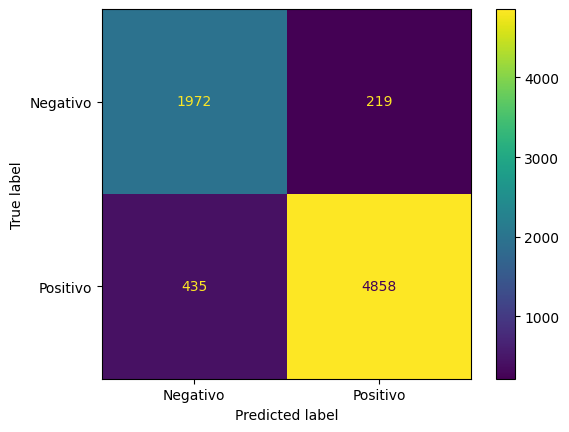

In [42]:
#criação das probabilidades
y_pred_prob2 = model_lstm_onehot.predict(X_test)
y_pred2 = (y_pred_prob2 > abt['target'].mean()).astype(int)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred2)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])
disp.plot(values_format='d')

In [43]:
#metricas
from sklearn.metrics import balanced_accuracy_score,accuracy_score, precision_score, recall_score, f1_score
# Calcular as métricas
accuracy2 = accuracy_score(y_test, y_pred2)
balanced_accuracy2 = balanced_accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)

# Exibir as métricas
print(f'Acurácia: {accuracy2:.4f}')
print(f'Acurácia balanceada: {balanced_accuracy2:.4f}')
print(f'Precisão: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')
print(f'F1-Score: {f12:.4f}')

Acurácia: 0.9126
Acurácia balanceada: 0.9089
Precisão: 0.9569
Recall: 0.9178
F1-Score: 0.9369


In [44]:
#TABELA COMPARATIVA ENTRE OS 2 MODELOS
tabela_comparativa=pd.DataFrame(
    [
 ['Rede densa',accuracy,balanced_accuracy,precision,recall,f1],
 ['LSTM',accuracy2,balanced_accuracy2,precision2,recall2,f12],
    ],
    columns=['modelo','acuracia','acuracia_balanceada', 'precision', 'recall', 'f1']
)
tabela_comparativa


,modelo,acuracia,acuracia_balanceada,precision,recall,f1
0,Rede densa,0.918359,0.894282,0.938494,0.936898,0.937695
1,LSTM,0.912614,0.908931,0.956864,0.917816,0.936933


In [76]:
#CONCLUSÃO

"""
O modelo com a rede densa obteve acurácia maior que a LSTM. Porém, este último possui a acurácia balanceada maior, além do valor do precision.
F1 score ficou bem próximo para os 2 casos.
Com isso, escolheu-se o LSTM, por entender que este modelo conseguiu captar melhor o desbalanceamento da base
"""

'\nO modelo com a rede densa obteve acurácia maior que a LSTM. Porém, este último possui a acurácia balanceada maior, além do valor do precision.\nF1 score ficou bem próximo para os 2 casos.\nCom isso, escolheu-se o LSTM, por entender que este modelo conseguiu captar melhor o desbalanceamento da base\n'

#5-NUVEM DE PALAVRAS

In [73]:
#tratando o texto
full_text = ' '.join(abt['review_comment_message'])



In [74]:
# cria o objeto da figura da word cloud
from wordcloud import WordCloud
wc = WordCloud(background_color='black').generate(full_text)

##5.1-Nuvem das palavras gerais

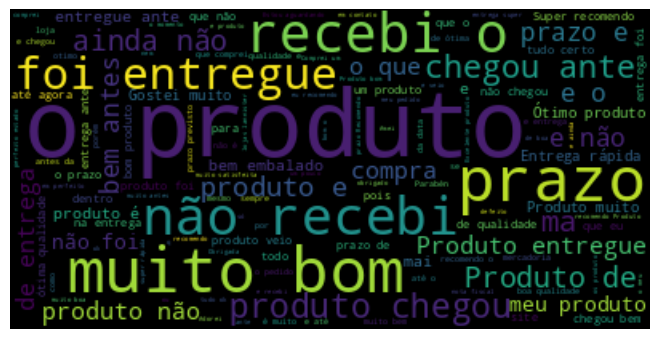

In [75]:
# plota a word cloud geral
import matplotlib.pyplot as plt

plt.imshow(wc, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

##5.2 - Nuvem de palavras - classe positiva

#5.2.1-Classificação real

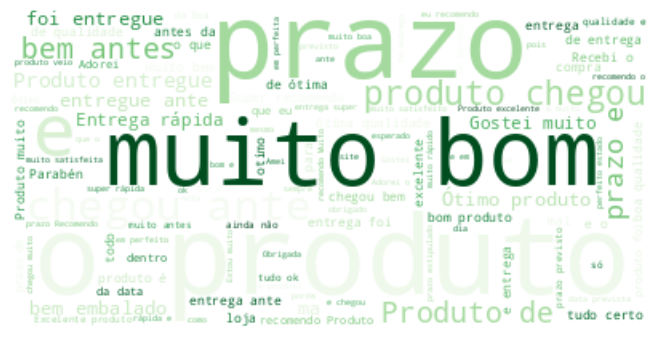

In [49]:
full_text_positive = ' '.join(abt.query('classe=="positivo"')['review_comment_message'])
wc2 = WordCloud(background_color='white',colormap='Greens').generate(full_text_positive)
plt.imshow(wc2, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

##5.2.2-Classificação modelo LSTM

In [50]:
#nuvem de palaras positiva de acordo com o modelo
#estabelecendo a abt nova para criar uma coluna do modelo
abt2=abt

In [51]:
abt2.head(10)

,review_comment_message,classe,target,comentarios_tokenizados
0,Recebi bem antes do prazo estipulado.,positivo,1,"[15, 26, 12, 5, 8, 211]"
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1,"[69, 157, 58, 82, 72, 105, 436, 604, 3, 591, 6..."
2,aparelho eficiente. no site a marca do aparelh...,positivo,1,"[441, 325, 16, 63, 4, 390, 5, 441, 130, 2189, ..."
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1,"[32, 22, 164, 3513, 84, 168, 756, 57, 20]"
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1,"[120, 352, 1, 100, 3, 11, 12, 5, 8]"
5,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",negativo,0,"[192, 6, 186, 2, 10, 318, 68, 15, 3, 162, 38, ..."
6,Péssimo,negativo,0,[323]
7,Loja nota 10,positivo,1,"[34, 87, 151]"
8,obrigado pela atençao amim dispensada,positivo,1,"[128, 105, 3100, 7099, 5150]"
9,A compra foi realizada facilmente.\r\nA entreg...,positivo,1,"[4, 38, 19, 462, 2190, 20, 4, 11, 19, 837, 9, ..."


In [52]:
X_train

array([[  2,  10, 156, ...,   0,   0,   0],
       [ 43,   9,   6, ...,   0,   0,   0],
       [103,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   6,  71, ...,   0,   0,   0],
       [ 11,  49,   3, ...,   0,   0,   0],
       [ 18, 115,  42, ...,   0,   0,   0]], dtype=int32)

In [53]:
padded_seq_abt2 = pad_sequences(abt2['comentarios_tokenizados'], maxlen=max_length, padding='post')


In [54]:
abt2['proba_lstm'] = model_lstm_onehot.predict(padded_seq_abt2)

1170/1170 [==============================] - 4s 3ms/step


<ipython-input-54-c22a768c0102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt2['proba_lstm'] = model_lstm_onehot.predict(padded_seq_abt2)


In [55]:
pc=abt['target'].mean()
abt2['classe_lstm'] = np.where(abt2['proba_lstm'] >= pc, 'positivo', 'negativo')

<ipython-input-55-12fe665ff0e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abt2['classe_lstm'] = np.where(abt2['proba_lstm'] >= pc, 'positivo', 'negativo')


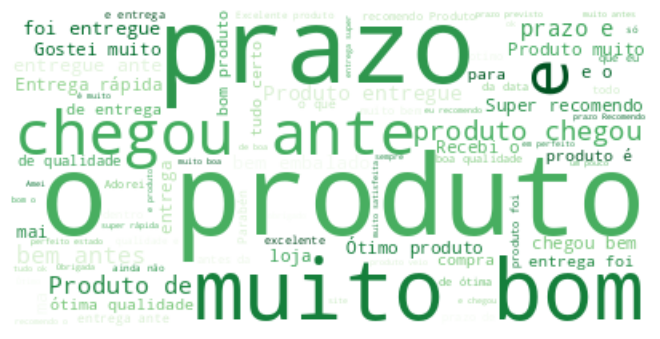

In [56]:
full_text_positive2 = ' '.join(abt2.query('classe=="positivo"')['review_comment_message'])
wc3 = WordCloud(background_color='white',colormap='Greens').generate(full_text_positive2)
plt.imshow(wc3, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

In [57]:
"""
As palavras positivas mais destacadas aparentemente estão parecidas com as palavras destacadas pela classe do modelo
"""

'\nAs palavras positivas mais destacadas aparentemente estão parecidas com as palavras destacadas pela classe do modelo\n'

##5.3 - Nuvem de palavras - classe negativa

##5.3.1-Classe real

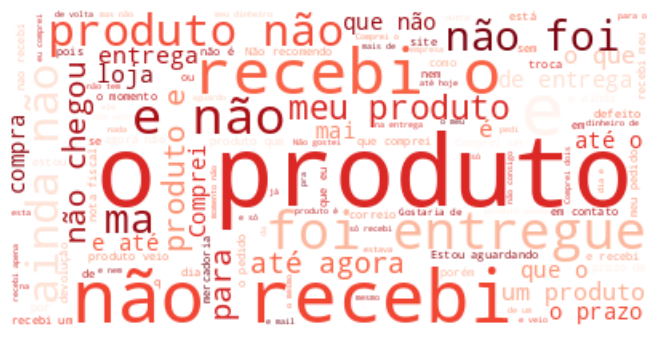

In [58]:
full_text_negativa = ' '.join(abt.query('classe=="negativo"')['review_comment_message'])
wc3 = WordCloud(background_color='white',colormap='Reds').generate(full_text_negativa)
plt.imshow(wc3, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

##5.3.2 - Classificação do modelo LSTM

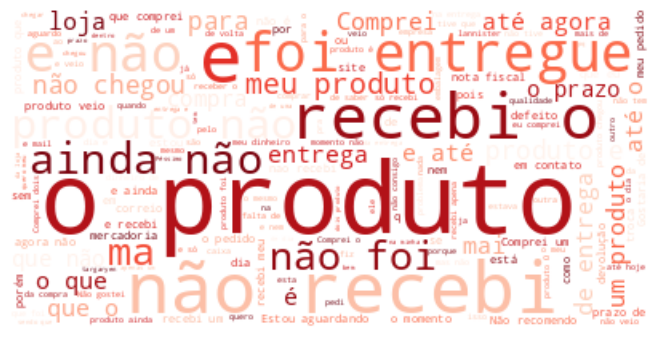

In [59]:
full_text_negativo2 = ' '.join(abt2.query('classe=="negativo"')['review_comment_message'])
wc3 = WordCloud(background_color='white',colormap='Reds').generate(full_text_negativo2)
plt.imshow(wc3, interpolation='bilinear')
plt.grid('off')
plt.axis('off')
plt.tight_layout(pad=0)

In [60]:
"""

A classe negativa predita pelo modelo apresenta palavras semelhante as comparadas com a classe positiva real.

"""

'\n\nA classe negativa predita pelo modelo apresenta palavras semelhante as comparadas com a classe positiva real.\n\n'

#6-COMPARAÇÃO DOS DADOS REAIS E MODELO

In [61]:
abt2.head(10)

,review_comment_message,classe,target,comentarios_tokenizados,proba_lstm,classe_lstm
0,Recebi bem antes do prazo estipulado.,positivo,1,"[15, 26, 12, 5, 8, 211]",0.996512,positivo
1,Parabéns lojas lannister adorei comprar pela I...,positivo,1,"[69, 157, 58, 82, 72, 105, 436, 604, 3, 591, 6...",0.997133,positivo
2,aparelho eficiente. no site a marca do aparelh...,positivo,1,"[441, 325, 16, 63, 4, 390, 5, 441, 130, 2189, ...",0.994679,positivo
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positivo,1,"[32, 22, 164, 3513, 84, 168, 756, 57, 20]",0.994747,positivo
4,"Vendedor confiável, produto ok e entrega antes...",positivo,1,"[120, 352, 1, 100, 3, 11, 12, 5, 8]",0.996137,positivo
5,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",negativo,0,"[192, 6, 186, 2, 10, 318, 68, 15, 3, 162, 38, ...",0.012213,negativo
6,Péssimo,negativo,0,[323],0.011057,negativo
7,Loja nota 10,positivo,1,"[34, 87, 151]",0.915724,positivo
8,obrigado pela atençao amim dispensada,positivo,1,"[128, 105, 3100, 7099, 5150]",0.996773,positivo
9,A compra foi realizada facilmente.\r\nA entreg...,positivo,1,"[4, 38, 19, 462, 2190, 20, 4, 11, 19, 837, 9, ...",0.992905,positivo


In [62]:
#verificando os dados positivos reais e negativos do modelo
dados_positivo_negativo_modelo=abt2[(abt2['classe']=='positivo')&(abt2['classe_lstm']=='negativo')]
dados_positivo_negativo_modelo

,review_comment_message,classe,target,comentarios_tokenizados,proba_lstm,classe_lstm
74,Ainda não tive a oportunidade de testar,positivo,1,"[37, 7, 93, 4, 2056, 6, 659]",0.453751,negativo
83,"Uma das peças não encaixava, estava de diâmetr...",positivo,1,"[33, 124, 380, 7, 4139, 118, 6, 3524, 155, 36,...",0.010967,negativo
112,A,positivo,1,[4],0.680004,negativo
177,Até agora tudo bem estou esperando a entrega d...,positivo,1,"[46, 75, 35, 26, 45, 275, 4, 11, 5, 1]",0.017732,negativo
192,Otimo produto porem caro demais !!!,positivo,1,"[103, 1, 299, 334, 345]",0.455031,negativo
...,...,...,...,...,...,...
37259,"Loja melhor só na Irineu, vc não sabe nem eu",positivo,1,"[34, 158, 48, 30, 15095, 767, 7, 1208, 104, 36]",0.560308,negativo
37281,AINDA NÃO CHEGOU OS OUTROS PRODUTOS,positivo,1,"[37, 7, 13, 55, 387, 62]",0.011679,negativo
37311,Celular é bom só não gostei do carregador poqu...,positivo,1,"[392, 21, 18, 48, 7, 43, 5, 751, 5718, 89, 10,...",0.226919,negativo
37342,Atrasou apenas um dia pra entrega de todas as ...,positivo,1,"[836, 92, 22, 60, 85, 11, 6, 371, 52, 380, 134...",0.011982,negativo


In [63]:
#verificando algumas linhas
dados_positivo_negativo_modelo.iloc[0]['review_comment_message']

'Ainda não tive a oportunidade de testar'

In [78]:
#verificando algumas linhas
dados_positivo_negativo_modelo.iloc[15]['review_comment_message']

'Aida nao recebi o produto'

In [79]:
#verificando algumas linhas
dados_positivo_negativo_modelo.iloc[30]['review_comment_message']

'Sem nenhuma ocorrência. tudo dentro do programado.'

In [66]:
#APARECERAM 578 LINHAS NESTAS CONDIÇÕES
"""
modelo identificou alguns casos como negativo, provavelmente devido ao uso da palavra "não".
Outros casos não foi possível identificar a razão de ter classificado como negativo
"""

'\nmodelo identificou alguns casos como negativo, provavelmente devido ao uso da palavra "não".\nOutros casos não foi possível identificar a razão de ter classificado como negativo\n'

In [67]:
dados_negativo_positivo_modelo=abt2[(abt2['classe']=='negativo')&(abt2['classe_lstm']=='positivo')]
dados_negativo_positivo_modelo

,review_comment_message,classe,target,comentarios_tokenizados,proba_lstm,classe_lstm
264,Muito bom o produto e preço cobrado!,negativo,0,"[9, 18, 2, 1, 3, 115, 719]",0.993401,positivo
273,Excelente produto indico a qualquer pessoa.,negativo,0,"[40, 1, 255, 4, 491, 608]",0.997121,positivo
841,"Comprei um produto pra entregar na minha casa,...",negativo,0,"[31, 22, 1, 85, 235, 30, 53, 222, 154, 138, 3,...",0.717031,positivo
936,Apesar da demora na entrega. No mais foi tudo ...,negativo,0,"[263, 25, 204, 30, 11, 16, 42, 19, 35, 26]",0.840332,positivo
1012,"preço bom, entrega no prazo",negativo,0,"[115, 18, 11, 16, 8]",0.990167,positivo
...,...,...,...,...,...,...
36689,Faltaram duas embalagens,negativo,0,"[1735, 144, 1272]",0.771672,positivo
36864,Comprei na stark achando que seria entregue vi...,negativo,0,"[31, 30, 196, 1425, 10, 314, 23, 610, 529, 21,...",0.958792,positivo
36930,"A entrega foi feita corretamente, dentro do pr...",negativo,0,"[4, 11, 19, 242, 215, 50, 5, 8, 32, 4, 29, 5, ...",0.972669,positivo
36938,"Comprei uma saia para cama box solteiro, 100% ...",negativo,0,"[31, 33, 1180, 27, 534, 1282, 1336, 376, 1556,...",0.976214,positivo


In [68]:
#verificando algumas linhas
dados_negativo_positivo_modelo.iloc[0]['review_comment_message']

'Muito bom o produto e preço cobrado!'

In [69]:
dados_negativo_positivo_modelo.iloc[1]['review_comment_message']

'Excelente produto indico a qualquer pessoa.'

In [70]:
dados_negativo_positivo_modelo.iloc[10]['review_comment_message']

'Já tive um Skullcandy do mesmo modelo, a qualidade era inigualável, detalhes de acabamento perfeitos, experiência sonora agradável e potente, principalmente no destaque dos graves....este não é Skull.'

In [80]:
#470 linhas nestas condições
"""
Observa-se que alguns scores receberam notas negativas pelos clientes, contudo, os comentários possuem significados positivos.
Desta maneira, o modelo classificou como positivo
"""



'\nObserva-se que alguns scores receberam notas negativas pelos clientes, contudo, os comentários possuem significados positivos.\nDesta maneira, o modelo classificou como positivo\n'

#7 - CONCLUSÃO

In [81]:
"""
Foi possível se obter um modelo de análise de sentimento utilizando o LSTM com acurácia de 91,2%, F1 score de 93,3% e acurácia balanceada de 90,8%.
Estes indicadores mostram que o modelo está satisfatório.
A nuvem de palavras comparativas entre o real e o modelo apresenta muita semelhança, isto é, as palavras da nuvem positiva e da negativa
são semelhantes as apresentadas pela base real.
Em relação as divergências, para alguns casos que o modelo classificou como negativo e foi positivo na realidade, identificou-se o uso da palavra "não"
nos comentários
De forma inversa, o modelo classificou como positivo, mas está como negativo na base real.
Identificou-se que houveram comentários positivos na base, todavia, o score estava como negativo.
Desta maneira, o modelo identificou esses comentários como positivo.

"""

'\nFoi possível se obter um modelo de análise de sentimento utilizando o LSTM com acurácia de 91,2%, F1 score de 93,3% e acurácia balanceada de 90,8%.\nEstes indicadores mostram que o modelo está satisfatório.\nA nuvem de palavras comparativas entre o real e o modelo apresenta muita semelhança, isto é, as palavras da nuvem positiva e da negativa\nsão semelhantes as apresentadas pela base real.\nEm relação as divergências, para alguns casos que o modelo classificou como negativo e foi positivo na realidade, identificou-se o uso da palavra "não"\nnos comentários\nDe forma inversa, o modelo classificou como positivo, mas está como negativo na base real. \nIdentificou-se que houveram comentários positivos na base, todavia, o score estava como negativo.\nDesta maneira, o modelo identificou esses comentários como positivo.\n\n'